# EJERCICIOS

## 03_01 Analisis de datos: Limpieza, univariante, estadística

#### 1. Como repaso, vamos a ejercitar algunos aspectos básicos del análisis con ya conocido dataset del Titanic. Lo vamos a hacer de forma no guiada. En este notebook vamos a centrarnos en la limpieza y el análisis univariante como preparación para el siguiente notebook donde repasaremos algunos conceptos. Al igual que durante el curso, el análisis central es la supervivencia para los distintos tipos de tripulantes.

Explica tu razonamiento para imputar los valores *missings* de age. Ventajas y desventajas.

Se pide que calcules las siguientes probabilidades:
1. La probabilidad de que una mujer que viajase sola sobreviviese
2. La probabilidad de que alguien pagase un fare de más de 50
3. La probabilidad de que un hombre que viajase en primera clase sobreviviera y el intervalo de confianza al 95%.

#### Tip!


| Columna/Variable | Descripción |
| ---------------- | ----------- |
| survived         | Indica si el pasajero sobrevivió (1) o no (0) |
| pclass           | Clase del pasaje (1ª, 2ª, 3ª) |
| sex              | Género del pasajero |
| age              | Edad del pasajero |
| sibsp            | Es el numero de familiares que viajan con la persona indicada en el manifiesto (lista de pasajeros) |
| parch            | Número de padres/hijos a bordo |
| fare             | Tarifa pagada por el pasajero |
| embarked         | Es la incial de la letra de la ciudad donde embarcó la persona.(C = Cherbourg; Q = Queenstown; S = Southampton) |
| class            | Clase del pasaje como categoría (Primera, Segunda, Tercera) |
| who              | Categoría del pasajero (hombre, mujer, niño) |
| adult_male       | Booleano que indica si el pasajero es un hombre adulto |
| deck             | Cubierta del barco donde se ubicaba el pasajero |
| embark_town      | Ciudad de embarque: Cherbourg; Queenstown; Southampton)  |
| alive            | Indica si el pasajero está vivo ('yes') o muerto ('no') |
| alone            | Booleano que indica si el pasajero viajaba solo |

In [39]:

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bootcampviztools import *




Define una función para calcular la cardinalidad.

In [40]:
def card_tipo(df,umbral_categoria = 10, umbral_continua = 30):
    # Primera parte: Preparo el dataset con cardinalidades, % variación cardinalidad, y tipos
    df_temp = pd.DataFrame([df.nunique(), df.nunique()/len(df) * 100, df.dtypes]) # Cardinaliad y porcentaje de variación de cardinalidad
    df_temp = df_temp.T # Como nos da los valores de las columnas en columnas, y quiero que estas sean filas, la traspongo
    df_temp = df_temp.rename(columns = {0: "Card", 1: "%_Card", 2: "Tipo"}) # Cambio el nombre de la transposición anterior para que tengan más sentido, y uso asignación en vez de inplace = True (esto es arbitrario para el tamaño de este dataset)

    # Corrección para cuando solo tengo un valor
    df_temp.loc[df_temp.Card == 1, "%_Card"] = 0.00

    # Creo la columna de sugerenica de tipo de variable, empiezo considerando todas categóricas pero podría haber empezado por cualquiera, siempre que adapte los filtros siguientes de forma correspondiente
    df_temp["tipo_sugerido"] = "Categorica"
    df_temp.loc[df_temp["Card"] == 2, "tipo_sugerido"] = "Binaria"
    df_temp.loc[df_temp["Card"] >= umbral_categoria, "tipo_sugerido"] = "Numerica discreta"
    df_temp.loc[df_temp["%_Card"] >= umbral_continua, "tipo_sugerido"] = "Numerica continua"
    # Ojo los filtros aplicados cumplen con el enunciado pero no siguen su orden y planteamiento

    return df_temp

In [41]:
def frecuencias(df, columna_categorica, porcentaje = True):
    frec_abs = df[columna_categorica].value_counts() # Values_counts() me da las frecuencias absolutas
    frec_rel = df[columna_categorica].value_counts(normalize=True) * (100 if porcentaje else 1)  # Si activo el argumento normalize me da las relativas en tanto por 1, el argumento porcentaje de la función me permite pasarlo a tanto por cien

    # Crear DataFrame con ambas frecuencias
    frec_df = pd.DataFrame({'Frecuencia Absoluta': frec_abs, 'Frecuencia Relativa': frec_rel})

    return frec_df

In [42]:
def get_CV(df, columna):
    columna = [columna] if type(columna) == str else columna
    return df[columna].describe().T["std"]/df[columna].describe().T["mean"] * 100

In [43]:
df_titanic = sns.load_dataset('titanic')

In [44]:
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [45]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


Obtén el porcentaje de nulos y decide que hacer con las columnas con nulos y ejecútalo. Además deshazte de la columna "parch" que no la emplearemos.

In [46]:
df_titanic.isna().mean()*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [47]:
df_titanic= df_titanic.drop('parch',axis=1)

Analiza los valores de la columna who

In [48]:
df_titanic['who'].value_counts()

who
man      537
woman    271
child     83
Name: count, dtype: int64

In [49]:
df_titanic.groupby('who')['age'].mean()

who
child     6.369518
man      33.173123
woman    32.000000
Name: age, dtype: float64

Imputa los valores de la columna age para cada categoría de who

In [50]:
df_titanic['age_by_group']=df_titanic.groupby('who')['age'].transform('mean')

In [51]:
df_titanic.head()

,survived,pclass,sex,age,sibsp,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_by_group
0,0,3,male,22.0,1,7.2500,S,Third,man,True,NaN,Southampton,no,False,33.173123
1,1,1,female,38.0,1,71.2833,C,First,woman,False,C,Cherbourg,yes,False,32.000000
2,1,3,female,26.0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,32.000000
3,1,1,female,35.0,1,53.1000,S,First,woman,False,C,Southampton,yes,False,32.000000
4,0,3,male,35.0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,33.173123


In [52]:
df_titanic.loc[df_titanic['age'].isna(),'age']=df_titanic.loc[df_titanic['age'].isna(),'age_by_group']

In [53]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   survived      891 non-null    int64   
 1   pclass        891 non-null    int64   
 2   sex           891 non-null    object  
 3   age           891 non-null    float64 
 4   sibsp         891 non-null    int64   
 5   fare          891 non-null    float64 
 6   embarked      889 non-null    object  
 7   class         891 non-null    category
 8   who           891 non-null    object  
 9   adult_male    891 non-null    bool    
 10  deck          203 non-null    category
 11  embark_town   889 non-null    object  
 12  alive         891 non-null    object  
 13  alone         891 non-null    bool    
 14  age_by_group  891 non-null    float64 
dtypes: bool(2), category(2), float64(3), int64(3), object(5)
memory usage: 80.7+ KB


In [54]:
df_titanic.loc[df_titanic['embark_town'].isna(),'embark_town']=df_titanic['embark_town'].mode().iloc[0]

In [55]:
df_titanic.loc[df_titanic['embarked'].isna(),'embarked']=df_titanic['embarked'].mode().iloc[0]

In [56]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   survived      891 non-null    int64   
 1   pclass        891 non-null    int64   
 2   sex           891 non-null    object  
 3   age           891 non-null    float64 
 4   sibsp         891 non-null    int64   
 5   fare          891 non-null    float64 
 6   embarked      891 non-null    object  
 7   class         891 non-null    category
 8   who           891 non-null    object  
 9   adult_male    891 non-null    bool    
 10  deck          203 non-null    category
 11  embark_town   891 non-null    object  
 12  alive         891 non-null    object  
 13  alone         891 non-null    bool    
 14  age_by_group  891 non-null    float64 
dtypes: bool(2), category(2), float64(3), int64(3), object(5)
memory usage: 80.7+ KB


In [57]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   survived      891 non-null    int64   
 1   pclass        891 non-null    int64   
 2   sex           891 non-null    object  
 3   age           891 non-null    float64 
 4   sibsp         891 non-null    int64   
 5   fare          891 non-null    float64 
 6   embarked      891 non-null    object  
 7   class         891 non-null    category
 8   who           891 non-null    object  
 9   adult_male    891 non-null    bool    
 10  deck          203 non-null    category
 11  embark_town   891 non-null    object  
 12  alive         891 non-null    object  
 13  alone         891 non-null    bool    
 14  age_by_group  891 non-null    float64 
dtypes: bool(2), category(2), float64(3), int64(3), object(5)
memory usage: 80.7+ KB


In [58]:
df_titanic = df_titanic.drop('deck',axis=1)

In [59]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   survived      891 non-null    int64   
 1   pclass        891 non-null    int64   
 2   sex           891 non-null    object  
 3   age           891 non-null    float64 
 4   sibsp         891 non-null    int64   
 5   fare          891 non-null    float64 
 6   embarked      891 non-null    object  
 7   class         891 non-null    category
 8   who           891 non-null    object  
 9   adult_male    891 non-null    bool    
 10  embark_town   891 non-null    object  
 11  alive         891 non-null    object  
 12  alone         891 non-null    bool    
 13  age_by_group  891 non-null    float64 
dtypes: bool(2), category(1), float64(3), int64(3), object(5)
memory usage: 79.4+ KB


In [60]:
df_titanic.drop(["age_by_group"], axis = 1, inplace = True)


Sobre el dataset limpio, comenta la tabla de descripción obtenida con la función **card_tipo** de lo que es cada columna en función de su nombre y los valores. Para ayudarte:
* sibsp: Es el numero de familiares que viajan con la persona indicada en el manifiesto (lista de pasajeros)
* embarked: Es la incial de la letra de la ciudad donde embarcó la persona.


In [61]:
card_tipo(df_titanic)

,Card,%_Card,Tipo,tipo_sugerido
survived,2,0.224467,int64,Binaria
pclass,3,0.3367,int64,Categorica
sex,2,0.224467,object,Binaria
age,89,9.988777,float64,Numerica discreta
sibsp,7,0.785634,int64,Categorica
fare,248,27.833895,float64,Numerica discreta
embarked,3,0.3367,object,Categorica
class,3,0.3367,category,Categorica
who,3,0.3367,object,Categorica
adult_male,2,0.224467,bool,Binaria


Imputa embarked a través de embark town

In [62]:
df_titanic["embarked"] = df_titanic["embark_town"]

Sabiendo que el objetivo de nuestro análisis es hacer un estudio de la superviviencia y mortalidad en el viaje... Haz un análisis univariante completo y ordenado de las siguientes variables:
["survived","who","age","fare","class","embarked","alone"] y comenta los resultados.

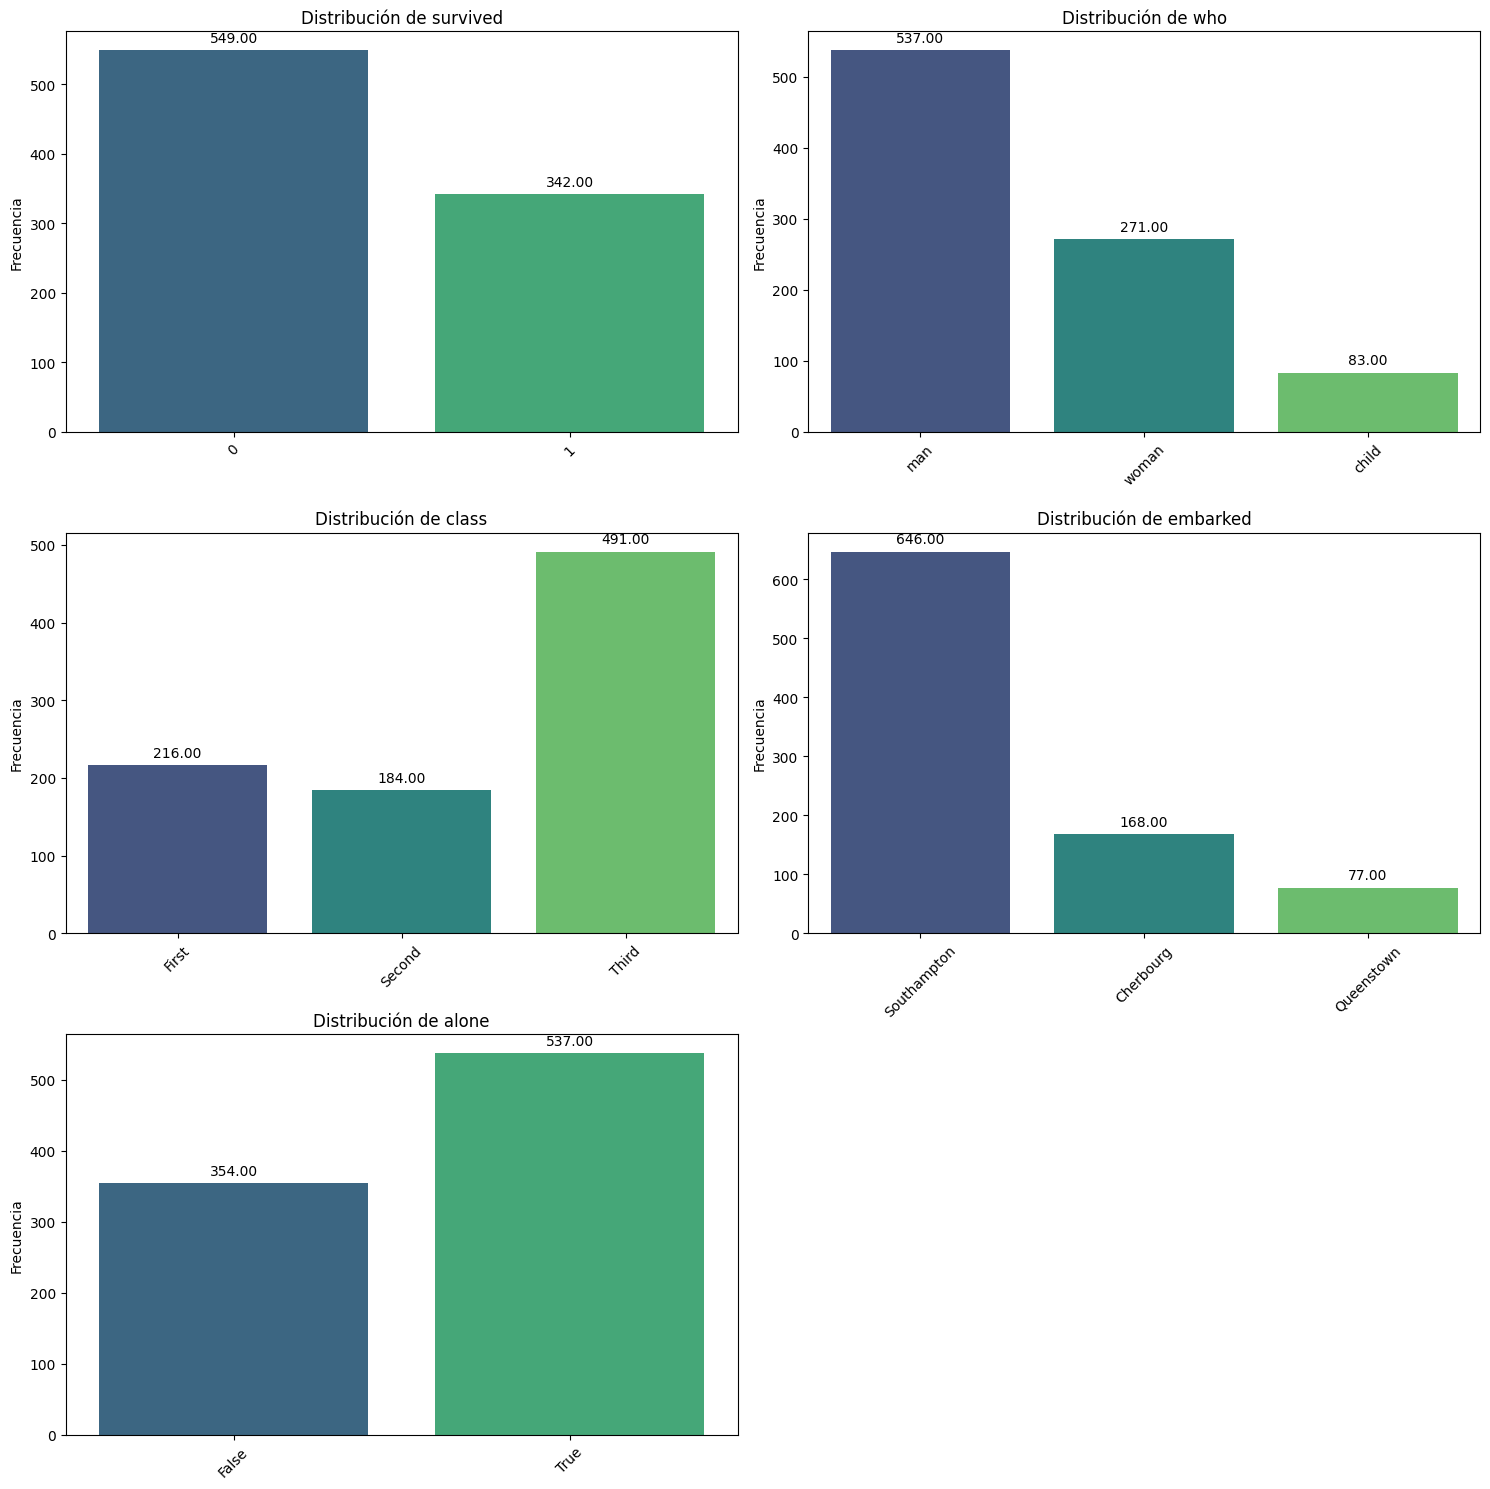

In [63]:
pinta_distribucion_categoricas(df_titanic,["survived","who","class","embarked","alone"],mostrar_valores=True)

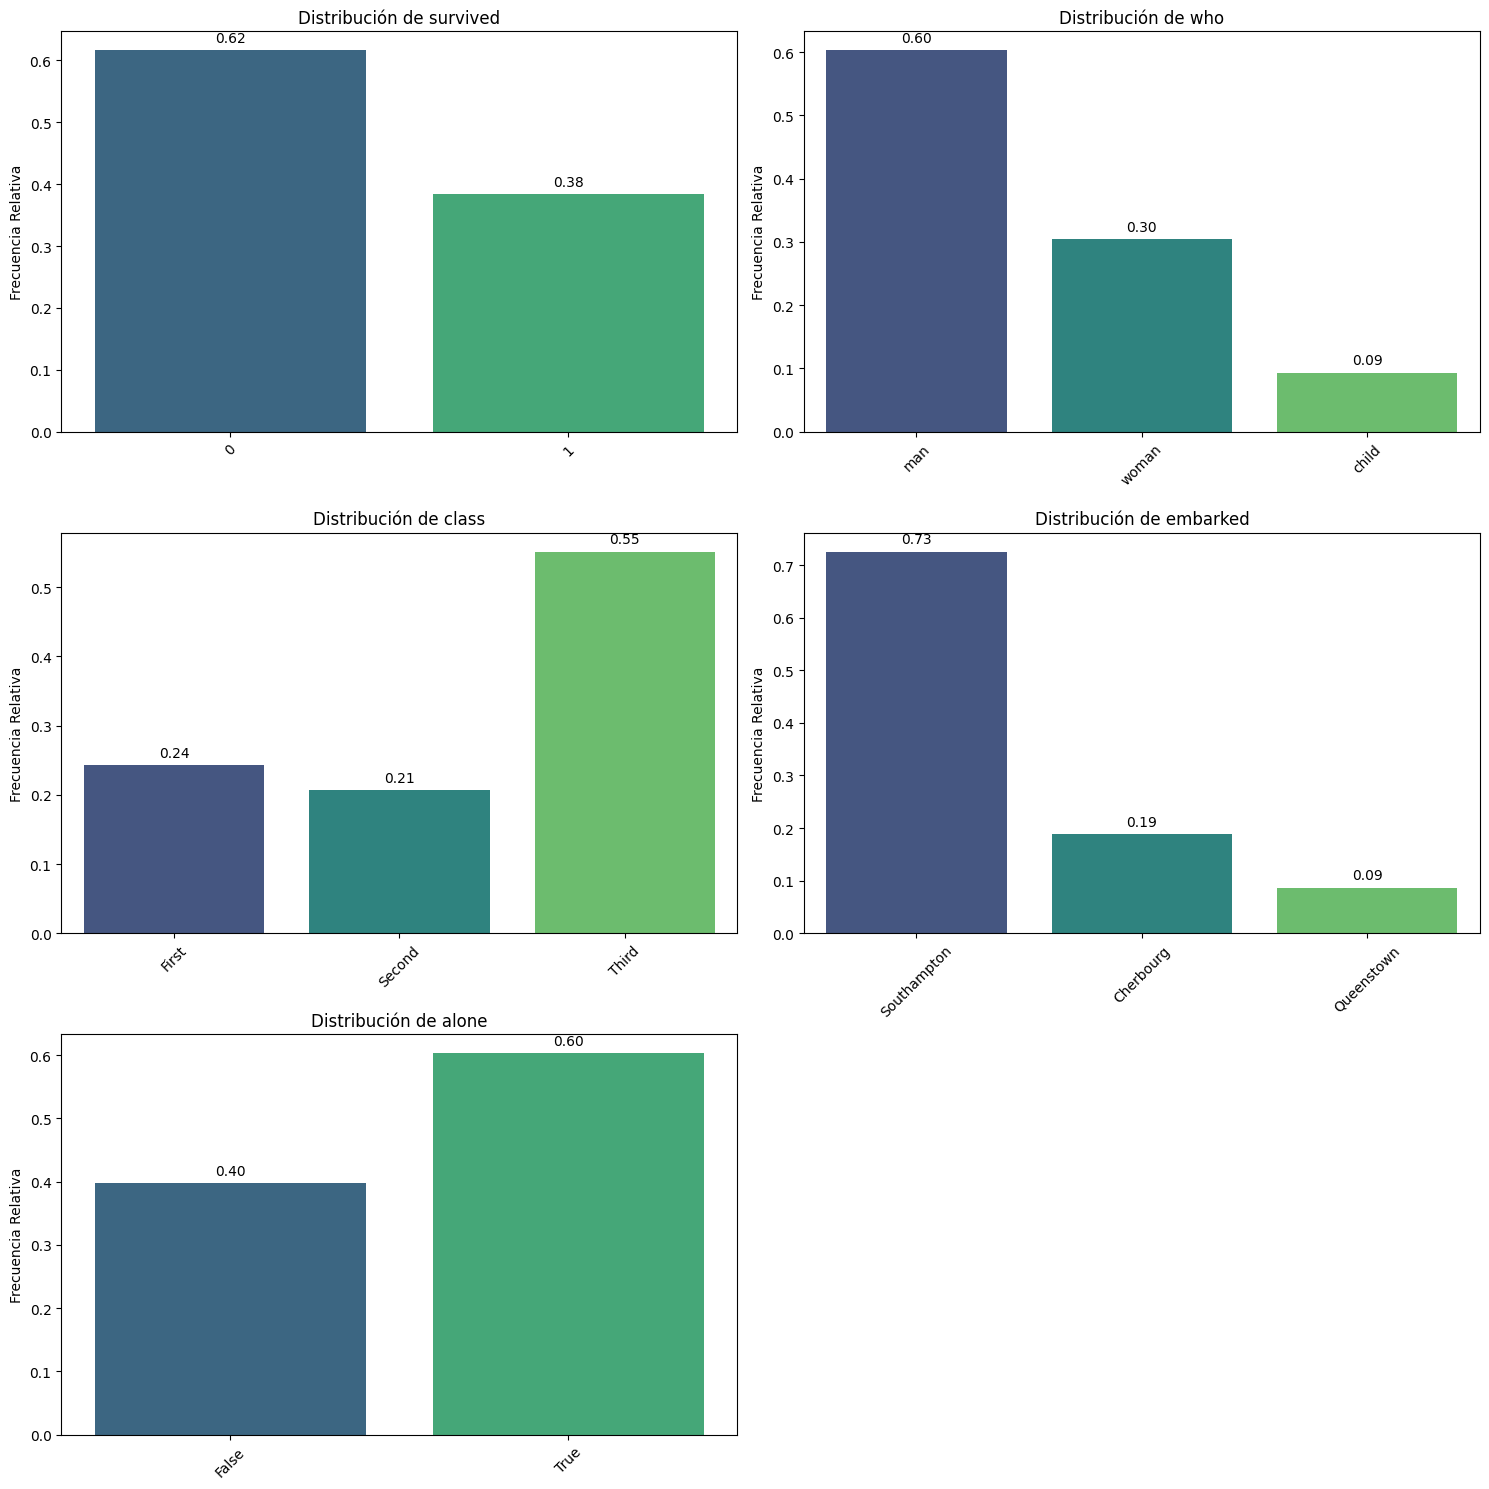

In [64]:
pinta_distribucion_categoricas(df_titanic,["survived","who","class","embarked","alone"],mostrar_valores=True,relativa=True)

In [65]:
df_titanic[["age","fare"]].describe()

,age,fare
count,891.000000,891.000000
mean,30.319458,32.204208
std,13.063839,49.693429
min,0.420000,0.000000
25%,22.000000,7.910400
50%,32.000000,14.454200
75%,35.000000,31.000000
max,80.000000,512.329200


In [66]:
get_CV(df_titanic,"age")

age    43.087311
dtype: float64

In [67]:
get_CV(df_titanic,"fare")

fare    154.307253
dtype: float64

(2, 2)


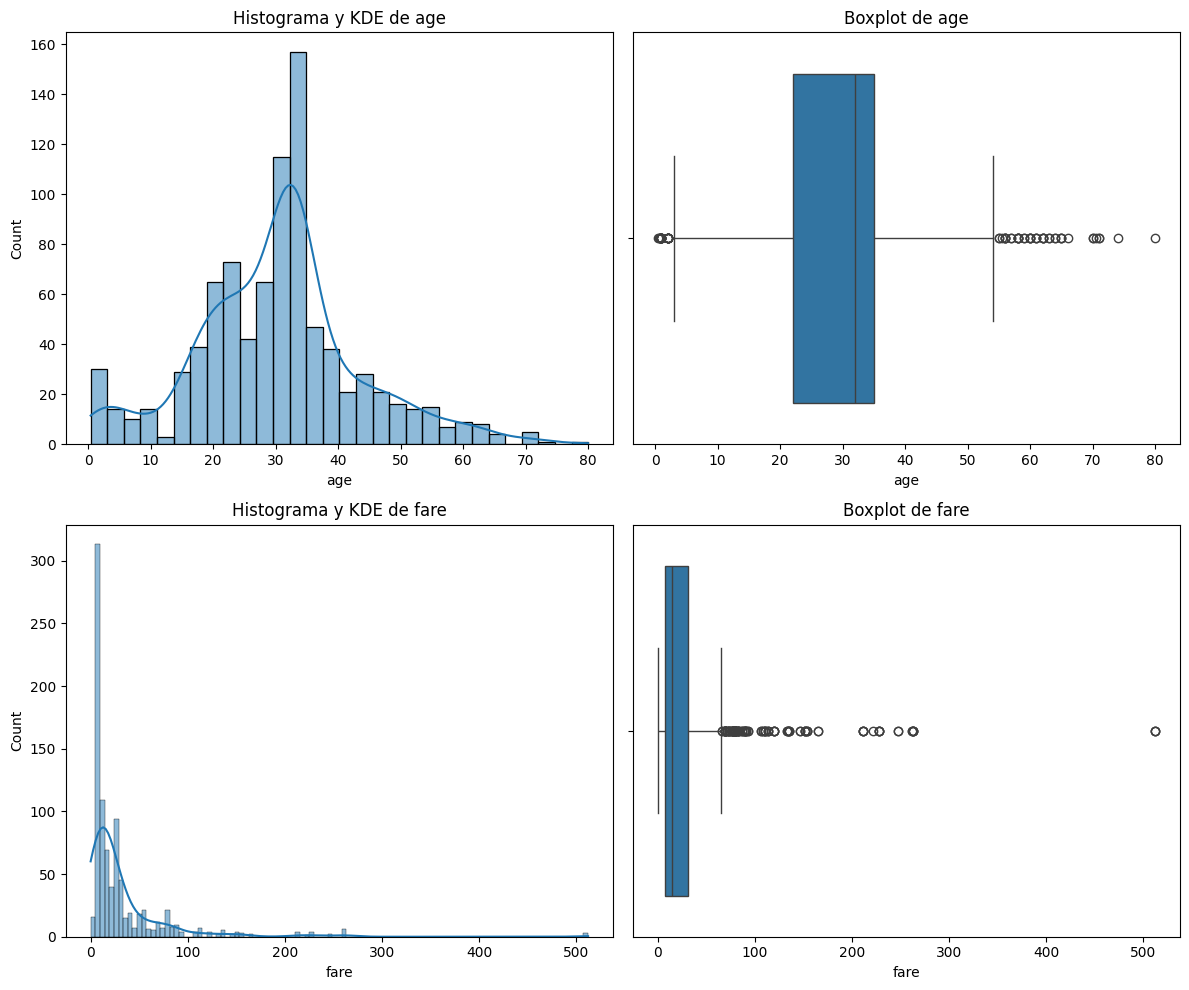

In [68]:
plot_combined_graphs(df_titanic,["age","fare"])

<Axes: >

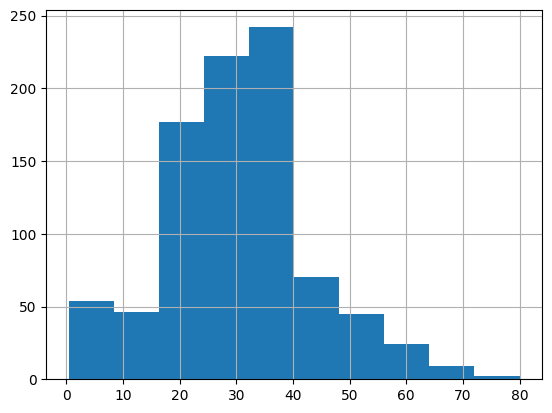

In [69]:
df_titanic.age.hist(bins=10)

<Axes: >

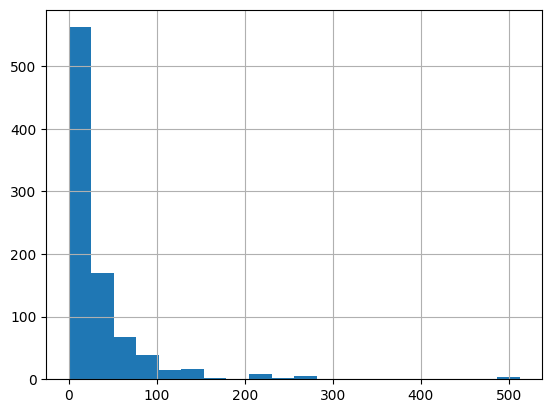

In [70]:
df_titanic.fare.hist(bins=20)

Calcula la probabilidad de que una mujer viajase sola

In [71]:
df_titanic['survived'].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

In [72]:
mujer = df_titanic['who']=='woman'
sola = df_titanic['alone'] == True

In [73]:
len(df_titanic[sola])

537

In [74]:
print(len(df_titanic[mujer & sola])/len(df_titanic[mujer]))

0.44649446494464945


In [75]:
# Contar el número total de pasajeros
total_passengers = len(df_titanic)

# Contar el número de pasajeros que pagaron un fare (tarifa) de más de 50
fare_above_50 = len(df_titanic[df_titanic['fare'] > 50])

# Calcular la probabilidad
probability = fare_above_50 / total_passengers

# Mostrar el resultado
print(f"Número total de pasajeros: {total_passengers}")
print(f"Número de pasajeros que pagaron más de 50: {fare_above_50}")
print(f"Probabilidad de que una persona pague más de 50: {probability:.4f}")

Número total de pasajeros: 891
Número de pasajeros que pagaron más de 50: 160
Probabilidad de que una persona pague más de 50: 0.1796


In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels as sm
from statsmodels.stats.proportion import proportion_confint

# Cargar el dataset del Titanic
df_titanic = sns.load_dataset('titanic')

# Filtrar para obtener solo los hombres que viajaban en primera clase
men_first_class = df_titanic[(df_titanic['sex'] == 'male') & (df_titanic['pclass'] == 1)]

# Calcular el número de hombres en primera clase que sobrevivieron
num_survivors = men_first_class['survived'].sum()
num_total = men_first_class.shape[0]

# Calcular la probabilidad de sobrevivir
probability = num_survivors / num_total

# Calcular el intervalo de confianza del 95% usando statsmodels
alpha = 0.05  # 1 - confidence level
ci_low, ci_high = proportion_confint(135, 366, alpha=alpha, method='normal')

# Mostrar los resultados
print(f"Número de hombres en primera clase: {num_total}")
print(f"Número de hombres que sobrevivieron: {num_survivors}")
print(f"Probabilidad de sobrevivir: {probability:.4f}")
print(f"Intervalo de confianza del 95%: ({ci_low:.4f}, {ci_high:.4f})")

Número de hombres en primera clase: 122
Número de hombres que sobrevivieron: 45
Probabilidad de sobrevivir: 0.3689
Intervalo de confianza del 95%: (0.3194, 0.4183)
